# A modified optimizer that uses an arbitrary function y=f(seq)

In [1]:
from badass.mld.general_optimizer import GeneralProteinOptimizer

from typing import List, Dict, Any, Tuple
import logging
logger = logging.getLogger(__name__)

In [2]:
from Bio.Align import substitution_matrices
matrix = substitution_matrices.load("BLOSUM62")

def dummy_scorer(seqs: List[str]) -> List[float]:
    # blosum score to the reference sequence
    target_seq = "MCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWY"
    return [sum(matrix[ref][seq] for ref, seq in zip(target_seq, seq)) for seq in seqs]

In [3]:
starting_seq = ''.join(['A'] * len('MCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWYMCDEFGHIKLMNPQRSTVWY'))

In [4]:
logging.basicConfig(level=logging.INFO)

In [5]:
params = {
    'seqs_per_iter': 500,
    'num_iter': 200,
    'num_mutations': 10,
    'score_threshold': None,
    'T': 1.5,
    'cooling_rate': 0.9,
    'forbidden_sites': [1, len(starting_seq)],  # Protect termini
    # 'adaptive_upper_threshold': 0.9
    
}

optimizer = GeneralProteinOptimizer(predictor=dummy_scorer, ref_seq=starting_seq, optimizer_params=params)

INFO:badass.mld.general_optimizer:Computing initial score matrix, using batches of 500.
INFO:badass.mld.general_optimizer:Computing scores for 1881 single mutants.
INFO:badass.mld.general_optimizer:Finished sequence 0 of 1881.
INFO:badass.mld.general_optimizer:Finished sequence 500 of 1881.
INFO:badass.mld.general_optimizer:Finished sequence 1000 of 1881.
INFO:badass.mld.general_optimizer:Finished sequence 1500 of 1881.
INFO:badass.mld.general_optimizer:Reference score value: -104.0000, std dev: 2.3567.
INFO:badass.mld.general_optimizer:Attempting to compute reasonable phase transition score threshold to -103.
INFO:badass.mld.general_optimizer:Setting phase reversal threshold to -105.


In [6]:
# Run optimization
results, stats = optimizer.optimize()

INFO:badass.mld.general_optimizer:Starting iter 0: processing 500 sequences, using T = 1.5.
INFO:badass.mld.general_optimizer:Joint probability has 1.31e+03 effective entries: 86 sites, 17.8 amino acids.
INFO:badass.mld.general_optimizer:>> 500 out of 500 sequences this iteration are new and will be scored.
INFO:badass.mld.general_optimizer:We have explored 500 sequences. Finished iter 0 with mean score of -86.9, and std. dev. 11.9.
INFO:badass.mld.general_optimizer:Starting iter 1: processing 500 sequences, using T = 1.4.
INFO:badass.mld.general_optimizer:Joint probability has 407 effective entries: 66.3 sites, 15.9 amino acids.
INFO:badass.mld.general_optimizer:>> 500 out of 500 sequences this iteration are new and will be scored.
INFO:badass.mld.general_optimizer:We have explored 1000 sequences. Finished iter 1 with mean score of -84.4, and std. dev. 12.3.
INFO:badass.mld.general_optimizer:Starting iter 2: processing 500 sequences, using T = 1.2.
INFO:badass.mld.general_optimizer:Jo

/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py

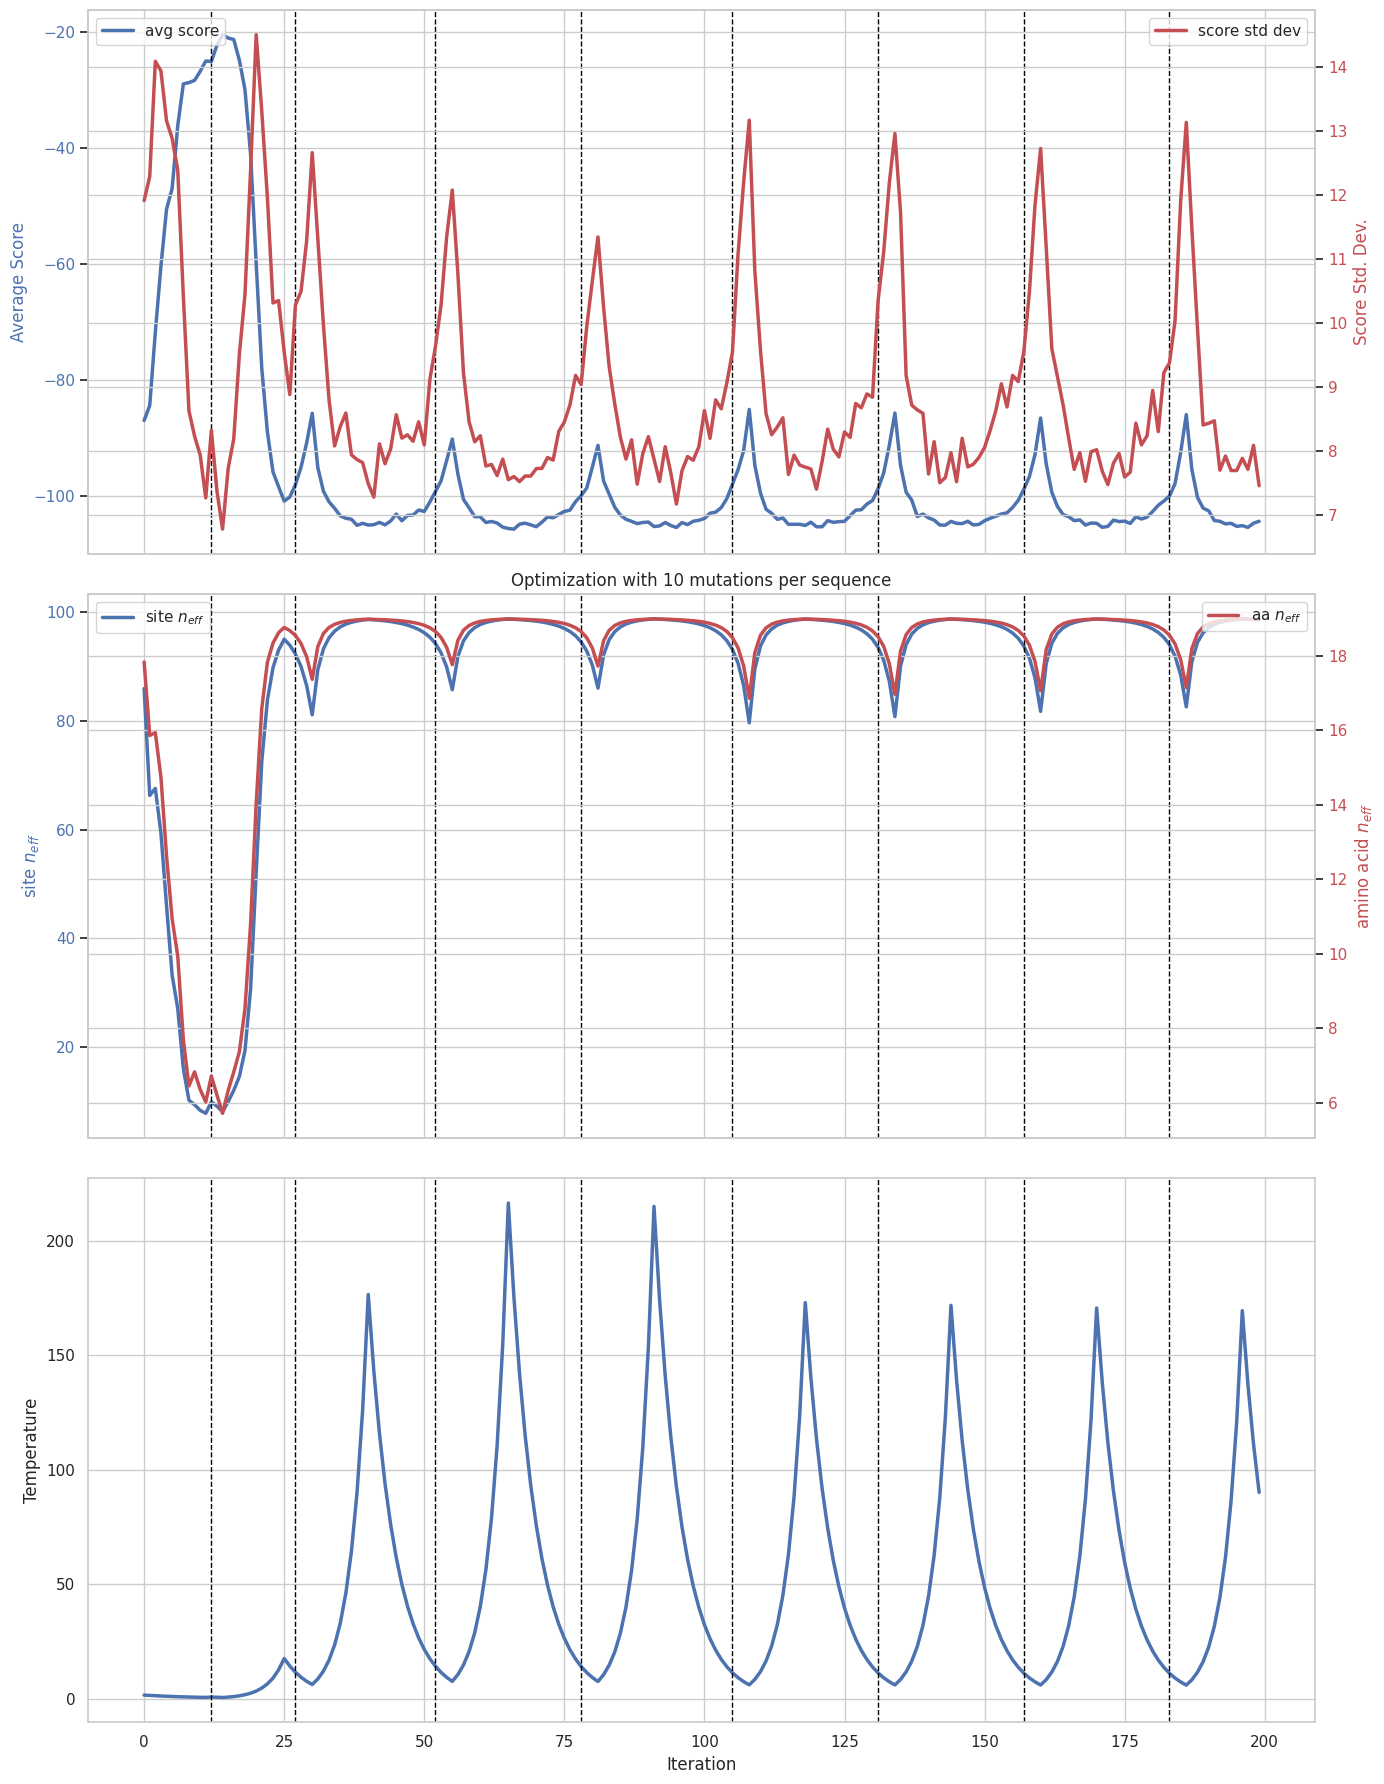

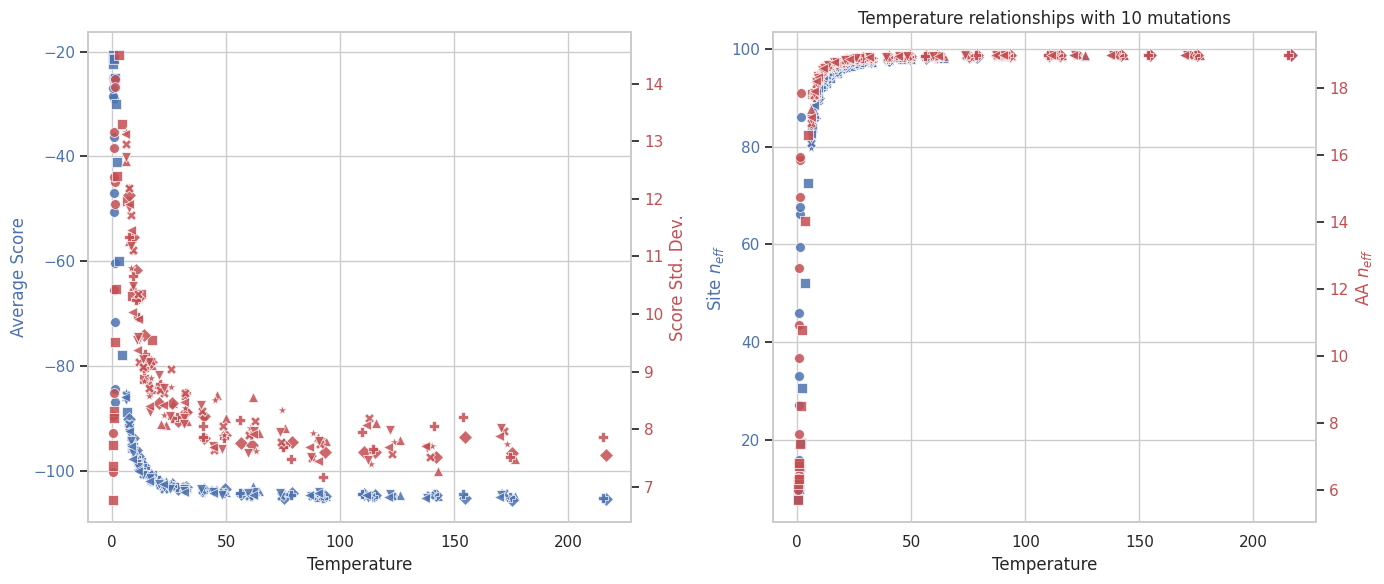

/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


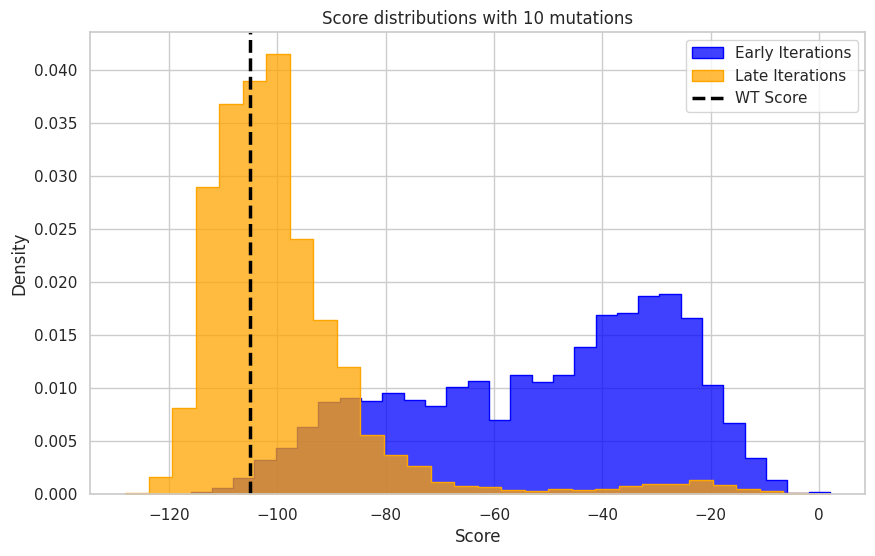

In [7]:
optimizer.plot_scores()

In [8]:
optimizer.score_threshold

-102.6543330740217

In [23]:
# now try with an adaptive threshold
params['adaptive_upper_threshold'] = 0.7

In [24]:
optimizer = GeneralProteinOptimizer(predictor=dummy_scorer, ref_seq=starting_seq, optimizer_params=params)

INFO:badass.mld.general_optimizer:Computing initial score matrix, using batches of 500.
INFO:badass.mld.general_optimizer:Computing scores for 1881 single mutants.
INFO:badass.mld.general_optimizer:Finished sequence 0 of 1881.
INFO:badass.mld.general_optimizer:Finished sequence 500 of 1881.
INFO:badass.mld.general_optimizer:Finished sequence 1000 of 1881.
INFO:badass.mld.general_optimizer:Finished sequence 1500 of 1881.
INFO:badass.mld.general_optimizer:Reference score value: -104.0000, std dev: 2.3567.
INFO:badass.mld.general_optimizer:Attempting to compute reasonable phase transition score threshold to -103.
INFO:badass.mld.general_optimizer:Setting phase reversal threshold to -105.


In [25]:
optimizer.optimize()

INFO:badass.mld.general_optimizer:Starting iter 0: processing 500 sequences, using T = 1.5.
INFO:badass.mld.general_optimizer:Joint probability has 1.31e+03 effective entries: 86 sites, 17.8 amino acids.
INFO:badass.mld.general_optimizer:>> 500 out of 500 sequences this iteration are new and will be scored.
INFO:badass.mld.general_optimizer:We have explored 500 sequences. Finished iter 0 with mean score of -86.9, and std. dev. 11.9.
INFO:badass.mld.general_optimizer:Starting iter 1: processing 500 sequences, using T = 1.4.
INFO:badass.mld.general_optimizer:Joint probability has 407 effective entries: 66.3 sites, 15.9 amino acids.
INFO:badass.mld.general_optimizer:>> 500 out of 500 sequences this iteration are new and will be scored.
INFO:badass.mld.general_optimizer:We have explored 1000 sequences. Finished iter 1 with mean score of -84.4, and std. dev. 12.3.
INFO:badass.mld.general_optimizer:Starting iter 2: processing 500 sequences, using T = 1.2.
INFO:badass.mld.general_optimizer:Jo

(                                               sequences  score  counts  \
 0       A7H-A19W-A27H-A39W-A52N-A59W-A62C-A79W-A82C-A99W   11.0       1   
 1       A7H-A19W-A39W-A59W-A60Y-A62C-A73P-A79W-A82C-A99W   10.0       1   
 2       A7H-A19W-A27H-A32N-A39W-A52N-A59W-A79W-A82C-A99W   10.0       2   
 3      A19W-A27H-A39W-A59W-A60Y-A62C-A73P-A79W-A82C-A99W   10.0       1   
 4       A7H-A19W-A27H-A39W-A52N-A59W-A62C-A65F-A79W-A99W   10.0       1   
 ...                                                  ...    ...     ...   
 81862   A2Q-A13C-A24C-A48T-A49L-A55F-A78G-A85R-A96F-A98F -124.0       1   
 81863  A15L-A16I-A23W-A25P-A38W-A42K-A64W-A68Y-A77H-A85K -124.0       1   
 81864   A4F-A19G-A32V-A34C-A37C-A50D-A55C-A58D-A76I-A98W -124.0       1   
 81865    A5T-A8Q-A26I-A62K-A68E-A73V-A76Y-A83W-A94V-A97F -125.0       1   
 81866  A22L-A35V-A38S-A46I-A54L-A55W-A58H-A86I-A96Y-A98K -129.0       1   
 
        num_mutations  iteration  
 0                 10        169  
 1              

/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py

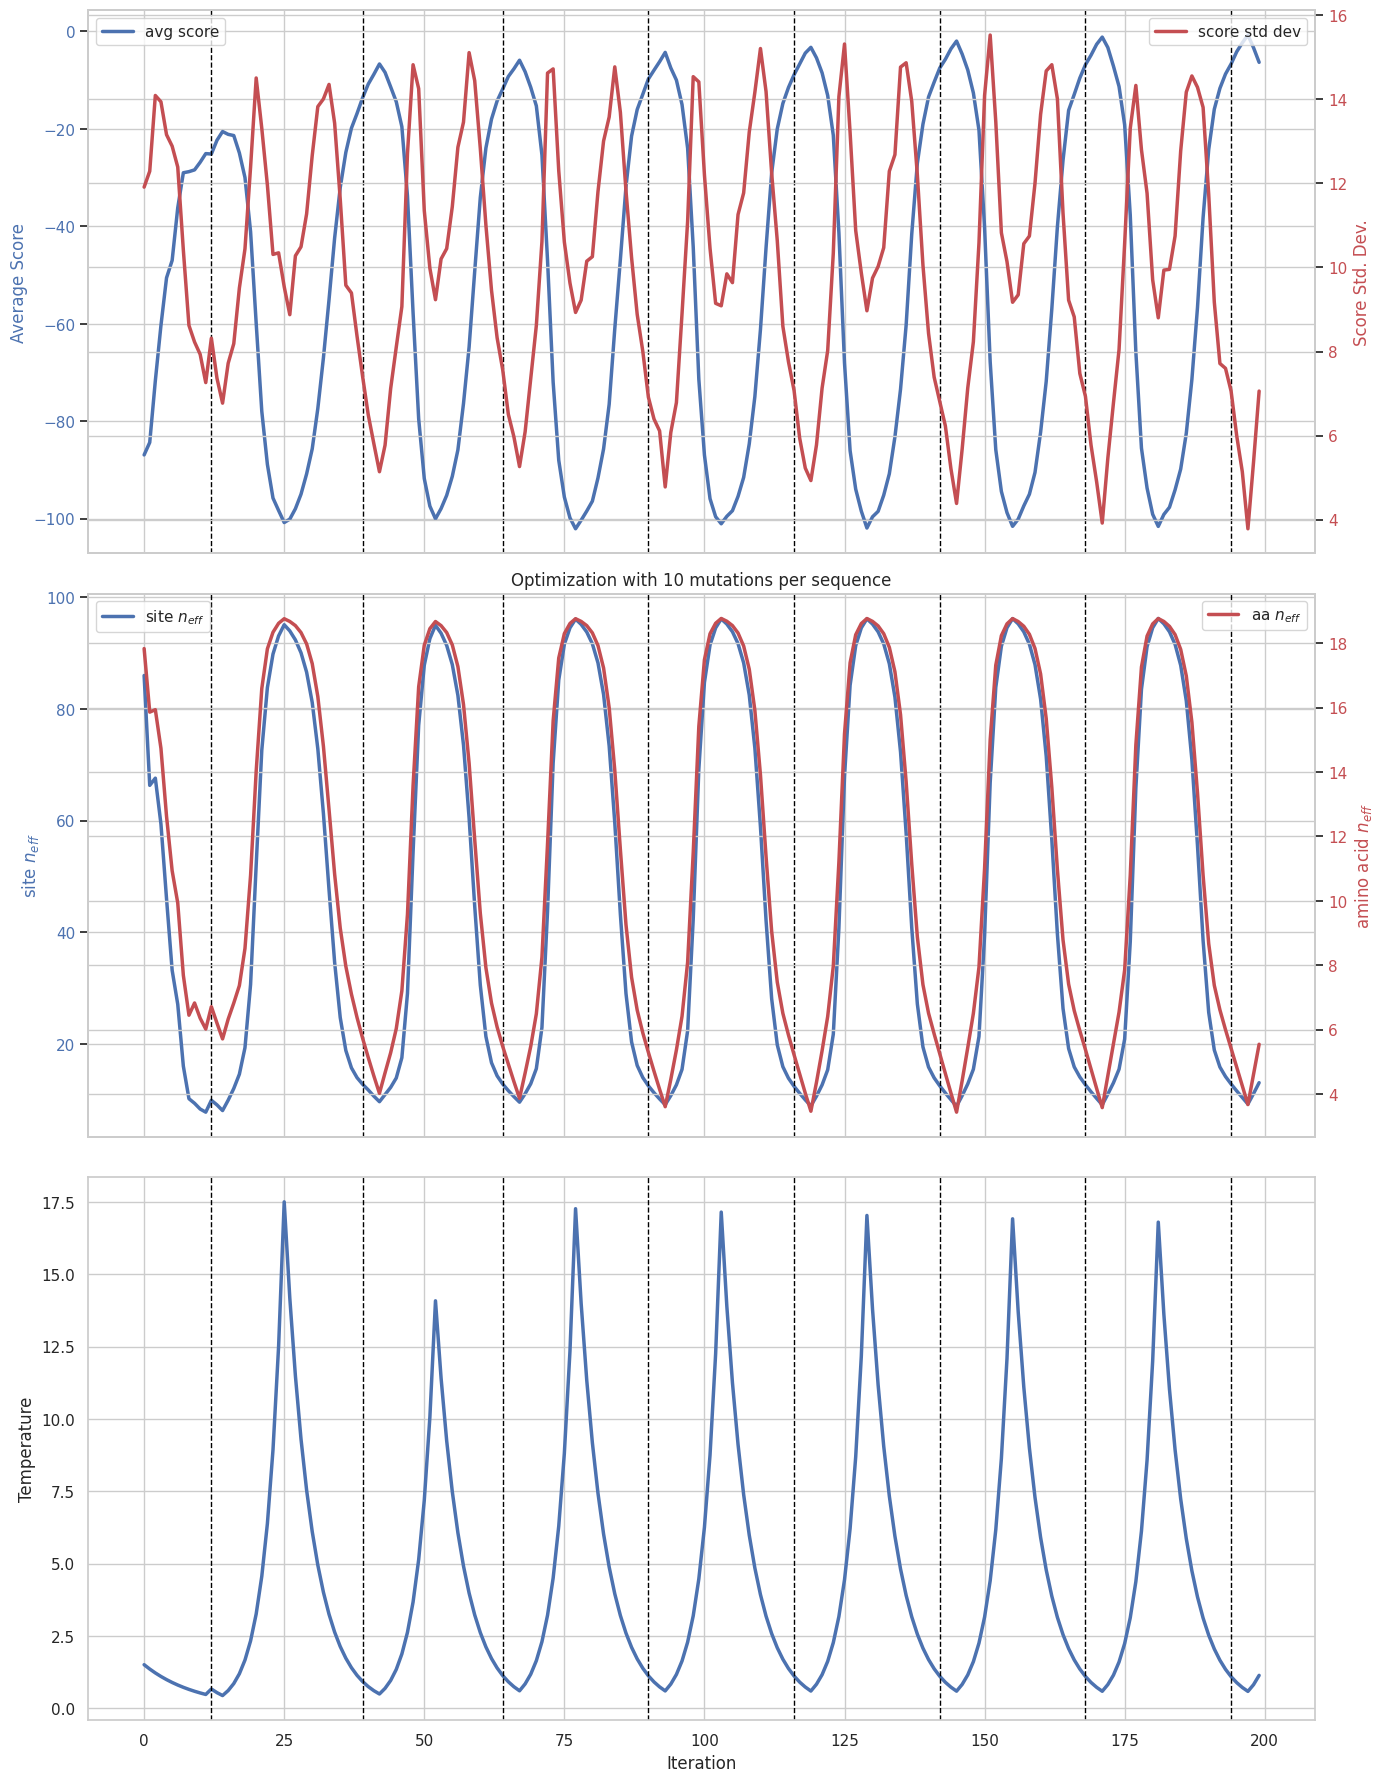

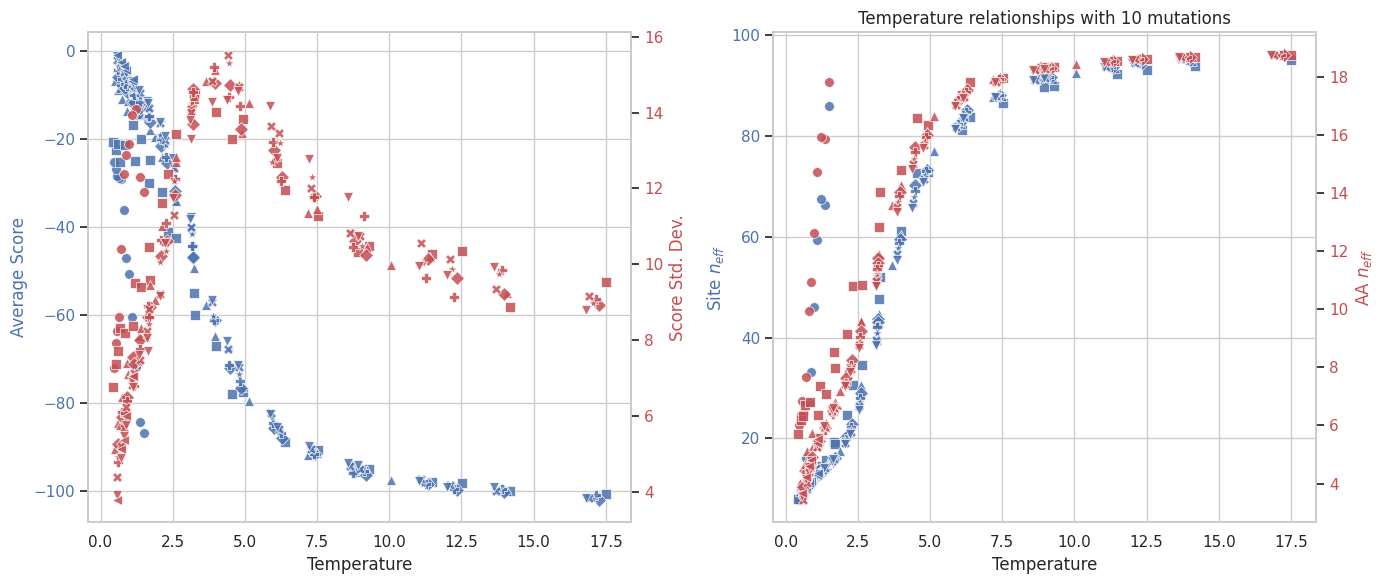

/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/proteinml/.links/miniconda3/envs/badass/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


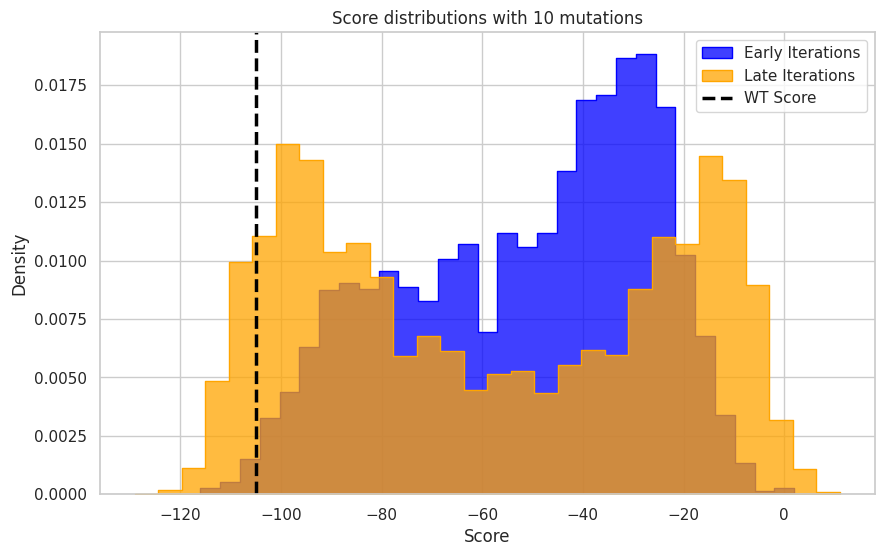

In [26]:
optimizer.plot_scores()